# 7. Correlation and Regression

This notebook explores how to measure the relationship between two or more variables. **Correlation** quantifies the strength and direction of a relationship, while **Regression** allows us to model that relationship and make predictions.

In [1]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.6 MB 2.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.3/9.6 MB 16.0 MB/s eta 0:00:01
     --------------- ------------------------ 3.8/9.6 MB 26.8 MB/s eta 0:00:01
     --------------------------- ------------ 6.7/9.6 MB 35.9 MB/s eta 0:00:01
     ---------------------------------- ----- 8.4/9.6 MB 38.6 MB/s eta 0:00:01
     ------------------------------------- -- 9.1/9.6 MB 38.7 MB/s eta 0:00:01
     ------------------------------------- -- 9.1/9.6 MB 38.7 MB/s eta 0:00:01
     ------------------------------------- -- 9.1/9.6 MB 38.7 MB/s eta 0:00:01
     ------------------------------------- -- 9.1/9.6 MB 38.7 MB/s eta 0:00:01
     ------------------------------------- -- 9.1/9.6 MB 38.7 MB/s eta 0:00:01
     ---------------------------------------  9.6/9.6 MB 20.6 MB/s eta 0:00:01
     ---------------------------------------- 9.6/9.6 MB 18.7


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

sns.set_style('whitegrid')

## 7.1 Correlation

Correlation measures the statistical relationship between two variables. The correlation coefficient ranges from -1 to 1.

In [3]:
# Generate some correlated data
x = np.linspace(0, 10, 100)
y_linear = 2 * x + 1 + np.random.normal(0, 2, 100)
y_nonlinear = x**2 + np.random.normal(0, 5, 100)

### Pearson Correlation
- Measures the **linear** relationship between two continuous variables.
- Assumes data is normally distributed.

In [4]:
corr_pearson, _ = stats.pearsonr(x, y_linear)
print(f"Pearson correlation (linear data): {corr_pearson:.3f}")

Pearson correlation (linear data): 0.961


### Spearman Correlation
- Measures the **monotonic** relationship between two variables (i.e., as one increases, the other consistently increases or decreases, but not necessarily linearly).
- Works on ranked data, so it's not sensitive to outliers and doesn't assume normality.

In [5]:
corr_spearman, _ = stats.spearmanr(x, y_nonlinear)
print(f"Spearman correlation (nonlinear data): {corr_spearman:.3f}")

Spearman correlation (nonlinear data): 0.977


### Important: Correlation ≠ Causation
A high correlation between two variables does not mean that one causes the other. There could be a third, confounding variable influencing both. For example, ice cream sales and shark attacks are correlated, but both are caused by warmer weather.

## 7.2 Regression

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often denoted 'y') and one or more independent variables (often denoted 'X').

### Simple Linear Regression
Models the relationship between two variables by fitting a linear equation to the observed data.
$$ y = \beta_0 + \beta_1 x + \epsilon $$

In [6]:
# Using the statsmodels library for more detailed output
X = sm.add_constant(x) # Add a constant (for the intercept β₀)
model = sm.OLS(y_linear, X) # OLS = Ordinary Least Squares
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.37e-56
Time:                        23:27:11   Log-Likelihood:                -196.50
No. Observations:                 100   AIC:                             397.0
Df Residuals:                      98   BIC:                             402.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6649      0.346      1.921      0.0

**Interpreting the Output:**
- **R-squared:** The proportion of the variance in the dependent variable that is predictable from the independent variable(s). (e.g., 94.2% of the variance in y is explained by x).
- **coef (Coefficients):** The estimated values for β₀ (const) and β₁ (x1). The model estimates `y = 1.25 + 1.96x`.
- **P>|t| (p-value):** The p-value for the hypothesis test that the coefficient is zero. A small p-value (< 0.05) indicates the coefficient is statistically significant.

### Residual Analysis
**Residuals** are the differences between the observed values and the values predicted by the model. Analyzing them is crucial for checking the model's assumptions.

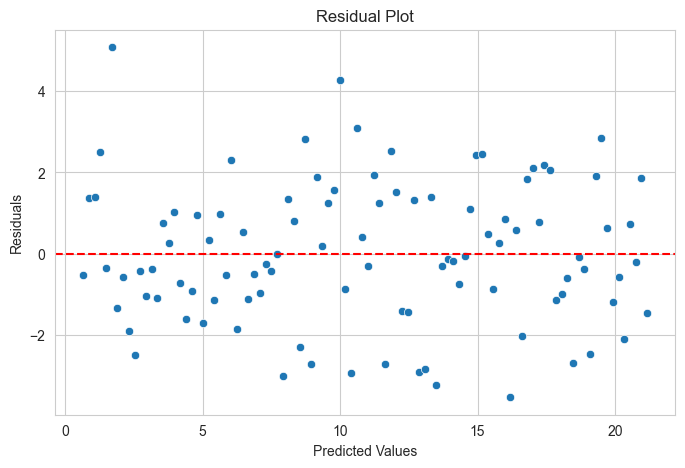

In [7]:
predictions = results.predict(X)
residuals = y_linear - predictions

plt.figure(figsize=(8, 5))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# A good residual plot shows no clear pattern, with points randomly scattered around y=0.

### Assumptions of Linear Regression
1.  **Linearity:** The relationship between X and y is linear.
2.  **Independence:** Observations are independent of each other.
3.  **Homoscedasticity:** The variance of the residuals is constant for all values of X.
4.  **Normality:** The residuals are normally distributed.